<a href="https://colab.research.google.com/github/Wairimukimm/Sentiment-Analysis/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#dataset - https://www.kaggle.com/datasets/crowdflower/twitter-airline-sentiment/data


In [2]:
#import the necessary libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
import nltk

In [3]:
#read in the data
data = pd.read_csv('Tweets.csv')

In [4]:
#display some information
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [5]:
#select columns to drop
columns=['tweet_id', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone']

In [6]:
#drop the columns
df=data.drop(columns,axis=1)

In [7]:
#display the data
df.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


In [8]:
#check for the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   airline_sentiment  14640 non-null  object
 1   text               14640 non-null  object
dtypes: object(2)
memory usage: 228.9+ KB


In [9]:
#check for shape
df.shape

(14640, 2)

In [10]:
#check for missing values
df.isnull().sum()

airline_sentiment    0
text                 0
dtype: int64

In [11]:
#check for duplicated values
df.duplicated().sum()

188

In [12]:
#drop the duplicates
df.drop_duplicates()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...
...,...,...
14635,positive,@AmericanAir thank you we got on a different f...
14636,negative,@AmericanAir leaving over 20 minutes Late Flig...
14637,neutral,@AmericanAir Please bring American Airlines to...
14638,negative,"@AmericanAir you have my money, you change my ..."


In [13]:
#dealing with categorical values
df['airline_sentiment']=df['airline_sentiment'].replace(['negative', 'neutral','positive'], [1, 0,2])

In [14]:
df.head()

,airline_sentiment,text
0,0,@VirginAmerica What @dhepburn said.
1,2,@VirginAmerica plus you've added commercials t...
2,0,@VirginAmerica I didn't today... Must mean I n...
3,1,@VirginAmerica it's really aggressive to blast...
4,1,@VirginAmerica and it's a really big bad thing...


In [15]:
#cleaning data
from nltk.stem import PorterStemmer
nltk.download('punkt')

#instantiate
stemmer = PorterStemmer()
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [16]:
stopwords = nltk.corpus.stopwords.words('english')

In [17]:
stopwords.append('virginamerica')

In [18]:
def clean_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    text = [t for t in text if len(t) > 1]
    text = [stemmer.stem(word) for word in text if word not in stopwords]
    text = ' '.join(text)
    return text

In [19]:
df['text'][14]

'@VirginAmerica Thanks!'

In [20]:
clean_text(df['text'][14])

'thank'

In [21]:
df['text'] = df['text'].apply(clean_text)

In [22]:
#factorization
from sklearn.feature_extraction.text import CountVectorizer

In [23]:
cv  = CountVectorizer(max_features=20000)

In [24]:
X = cv.fit_transform(df['text']).toarray()

In [25]:
y = df['airline_sentiment'].to_numpy()

In [26]:
#downsampling
print(np.unique(y))
print(np.bincount(y))

[0 1 2]
[3099 9178 2363]


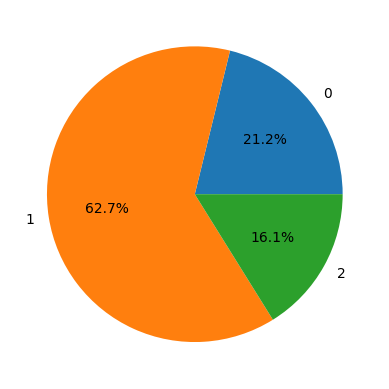

In [27]:
plt.pie(np.bincount(y), labels=np.unique(y), autopct="%1.1f%%")
plt.show()

# As we can see the number of negative tweets are greater than both possitive and neutral tweets so we need to make the data equal for each class

In [29]:
from imblearn.under_sampling import RandomUnderSampler
smote=RandomUnderSampler(sampling_strategy='auto',random_state=42)

In [30]:
X.shape

(14640, 12522)

In [31]:
y.shape

(14640,)

In [32]:
X, y = smote.fit_resample(X,y)

In [33]:
X.shape

(7089, 12522)

In [34]:
y.shape

(7089,)

In [35]:
print(np.unique(y))
print(np.bincount(y))

[0 1 2]
[2363 2363 2363]


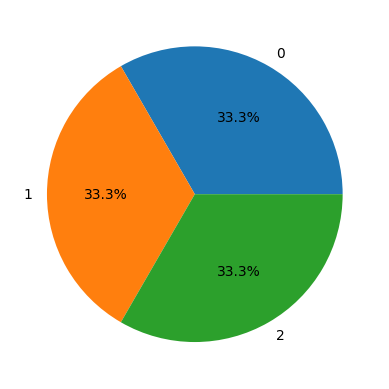

In [36]:
plt.pie(np.bincount(y), labels=np.unique(y), autopct="%1.1f%%")
plt.show()

In [37]:
#model training
from sklearn.naive_bayes import MultinomialNB

In [38]:
model = MultinomialNB()

In [39]:
model.fit(X, y)

MultinomialNB()

In [40]:
print("Training Data Accuracy: ")
print( model.score(X, y) )

Training Data Accuracy: 
0.8428551276625759


In [59]:
def sent_predict(row):
    text=clean_text(row)
    text = cv.transform([text])
    return model.predict(text)[0]

In [53]:
data = pd.read_csv('Percy Jackson and the Olympians.csv')
data.head()

,title,review,rating,date
0,This is not the same Percy that is in the books,I couldn't care less about the differences in ...,4.0,22 December 2023
1,Ehhh,The personalities for characters Percy and Ann...,5.0,27 December 2023
2,Pleasantly Surprised,"Initially, I had doubts about the show, especi...",9.0,20 December 2023
3,If I had a Time Machine...,I was 11 when I first read Percy Jackson and t...,8.0,21 December 2023
4,Meh,The movie is way better and so are the books. ...,2.0,26 December 2023


In [54]:
data.shape

(156, 4)

In [55]:
data.isnull().sum()

title     0
review    0
rating    2
date      0
dtype: int64

In [56]:
data['rating'].fillna(data['rating'].mean(), inplace=True)


<Axes: title={'center': 'Rating Graph of Percy Jackson and the Olympians'}>

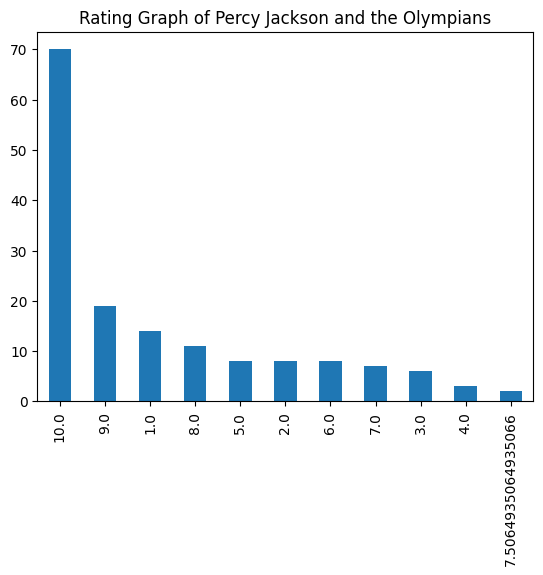

In [57]:
data['rating'].value_counts().plot.bar(title='Rating Graph of Percy Jackson and the Olympians')

In [60]:
data['sentiment'] = data['review'].apply(sent_predict)

<Axes: title={'center': 'Rating Graph of Percy Jackson and the Olympians'}, ylabel='sentiment'>

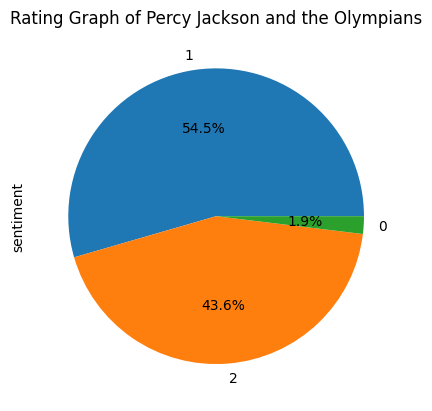

In [62]:
data['sentiment'].value_counts().plot.pie(title='Rating Graph of Percy Jackson and the Olympians', autopct="%1.1f%%")